In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def grid(n, prob):
    """
    Construct a grid with dimension n with probability prob
    """
    return np.random.choice([0, 1], size=(n, n), p=[prob, 1-prob])

In [12]:
def monte_carlo(samples, n, prob):
    """
    samples: number of samples (int)
    n: size of matrix  (odd int)
    prob: probability of getting 1 or 0 (0<=prob<=1)
    """
    count = 0.
    for _ in range(samples):
        b = grid(n, prob)
        b[(n-1)//2][(n-1)//2] = 2
        stop = False
        while not stop:
            change = False
            for i, j in zip(*np.where(b == 2)):
                if i == 0 or j == 0 or i == n - 1 or j == n - 1:
                    count += 1
                    stop = True
                    break
                if b[i+1, j] == 0:
                    b[i+1, j] = 2
                    change = True
                if b[i, j+1] == 0:
                    b[i, j+1] = 2
                    change = True
                if b[i-1, j] == 0:
                    b[i-1, j] = 2
                    change = True
                if b[i, j-1] == 0:
                    b[i, j-1] = 2
                    change = True
            if not change:
                stop = True
        #plt.imshow(b)
        #plt.show()
    return count / samples

In [22]:
def simulation(samples,n_matrix,n_prob):
    """
    Run simulation for various probabilities
    samples: Number of samples (int)
    n_matrix: Size of matrix (odd int)
    n_prob: How many points between 0 and 1
    """
    prob = np.linspace(0.,1.,n_prob)
    f = np.zeros(len(prob))
    for i,val in enumerate(prob):
        f[i] = monte_carlo(samples,n_matrix,val)
    plt.plot(prob,f, 'o')
    plt.title('Percolation')
    plt.xlabel('Probability')
    plt.ylabel('fraction of percolated')
    plt.show()

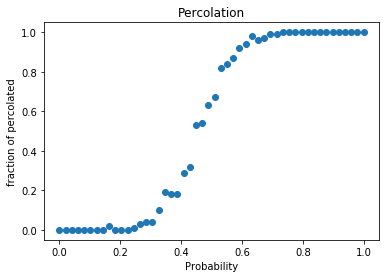

In [23]:
simulation(100,11,50)

In [108]:
import copy as cp

In [111]:
def writing_data(samples, n, prob):
    """
    samples: number of samples (int)
    n: size of matrix  (odd int)
    prob: probability of getting 1 or 0 (0<=prob<=1)
    """
    count = 0.
    mat = []
    vd = np.zeros(samples)
    for ind in range(samples):
        b = grid(n, prob)
        mat.append(cp.copy(b)) #Used copy to not have 2 on the matrix
        b[(n-1)//2][(n-1)//2] = 2
        stop = False
        while not stop:
            change = False
            for i, j in zip(*np.where(b == 2)):
                if i == 0 or j == 0 or i == n - 1 or j == n - 1:
                    count += 1
                    stop = True
                    vd[ind] = 1
                    break
                if b[i+1, j] == 0:
                    b[i+1, j] = 2
                    change = True
                if b[i, j+1] == 0:
                    b[i, j+1] = 2
                    change = True
                if b[i-1, j] == 0:
                    b[i-1, j] = 2
                    change = True
                if b[i, j-1] == 0:
                    b[i, j-1] = 2
                    change = True
            if not change:
                stop = True
    return np.array(mat),vd

In [112]:
import tensorflow as tf
from tensorflow import keras

In [146]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(11, 11)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [153]:
#traning data
td,tr = writing_data(1000,11,0.5)

In [154]:
#sample of training data
td[0], tr[0]

(array([[1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0],
        [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
        [0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1],
        [1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0],
        [0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1],
        [0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0],
        [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0]]), 0.0)

In [155]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [157]:
#training model
model.fit(td,tr, epochs = 10)

Epoch 1/10
1000/1000 [==============================] - 0s 253us/sample - loss: 0.6883 - acc: 0.6220
Epoch 2/10
1000/1000 [==============================] - 0s 74us/sample - loss: 0.6034 - acc: 0.6880
Epoch 3/10
1000/1000 [==============================] - 0s 84us/sample - loss: 0.5639 - acc: 0.7120
Epoch 4/10
1000/1000 [==============================] - 0s 83us/sample - loss: 0.5272 - acc: 0.7490
Epoch 5/10
1000/1000 [==============================] - 0s 81us/sample - loss: 0.5077 - acc: 0.7570
Epoch 6/10
1000/1000 [==============================] - 0s 78us/sample - loss: 0.4734 - acc: 0.7870
Epoch 7/10
1000/1000 [==============================] - 0s 80us/sample - loss: 0.4577 - acc: 0.7980
Epoch 8/10
1000/1000 [==============================] - 0s 80us/sample - loss: 0.4393 - acc: 0.8010
Epoch 9/10
1000/1000 [==============================] - 0s 75us/sample - loss: 0.4017 - acc: 0.8270
Epoch 10/10
1000/1000 [==============================] - 0s 75us/sample - loss: 0.3842 - acc: 0.851

In [176]:
#test data
test_mat,test_v = writing_data(100,11,0.5)

In [177]:
#evaluate accuracy
test_loss, test_acc = model.evaluate(test_mat, test_v)
print('Test accuracy:', test_acc)


100/100 [==============================] - 0s 127us/sample - loss: 0.6627 - acc: 0.7000
('Test accuracy:', 0.7)


In [168]:
model.predict(test_mat)

array([[0.06540667, 0.9345933 ],
       [0.2445338 , 0.75546616],
       [0.05660626, 0.9433937 ],
       [0.34054044, 0.6594596 ],
       [0.30818528, 0.6918147 ],
       [0.05251069, 0.9474893 ],
       [0.6024402 , 0.39755988],
       [0.6049992 , 0.39500082],
       [0.13688102, 0.86311895],
       [0.31589863, 0.68410134],
       [0.05146451, 0.9485355 ],
       [0.24655017, 0.7534498 ],
       [0.05144748, 0.94855255],
       [0.01756817, 0.9824318 ],
       [0.15296389, 0.8470361 ],
       [0.31983647, 0.68016356],
       [0.22579095, 0.7742091 ],
       [0.2779227 , 0.72207737],
       [0.02959115, 0.97040886],
       [0.65142006, 0.34857994],
       [0.5218765 , 0.47812346],
       [0.24337387, 0.7566261 ],
       [0.18604308, 0.813957  ],
       [0.24912046, 0.7508795 ],
       [0.51637036, 0.48362967],
       [0.5803985 , 0.4196015 ],
       [0.08413482, 0.9158652 ],
       [0.1049005 , 0.8950995 ],
       [0.19314817, 0.80685186],
       [0.49677742, 0.5032226 ],
       [0.

In [167]:
q = np.zeros(len(model.predict(test_mat)))
count = 0.
for i,v in model.predict(test_mat):
    if i > v:
        print(i)
    else: 
        print(v)
        q[count] = 1.
    count += 1

0.9345933


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [166]:
q

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])